In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
from pandas_datareader import data
import fix_yahoo_finance as yf

import tqdm

from pandas.tseries.offsets import BDay

In [2]:
news = pd.read_csv('seekingalpha_top.csv', index_col=[0], parse_dates=['date'])
comments = pd.read_csv('seekingalpha_top_comments.csv', index_col=[0], parse_dates=['datetime'])

In [3]:
symbols = news.symbol[np.logical_not(news.symbol.isna())]

In [4]:
# first we will consider only symbols with more than 9 explicit mentioning in our dataset
universe = symbols.unique()[(symbols.value_counts() > 9)]

In [5]:
# lets leave only relevant news
filtered_news = news[news.symbol.apply((lambda x: x in universe))]

In [27]:
d = pd.datetime(2018, 10, 11)

Timestamp('2018-04-13 00:00:00')

In [93]:
class InvestmentSimulator():
    def __init__(self, universe, start_date, end_date, force_download=False):
        """ INPUT:
                universe - a list of strings with ticker symbols 
                start_date - a pandas Date object with starting date of the simulation
                finish_date - a pandas Date object with end date of the simulation
        """
        
        if(not force_download):
            try:
                self.close_prices = saved_prices
            except NameError:
                self.close_prices = yf.download(universe, 
                                                data_source = 'yahoo', 
                                                start=start_date, 
                                                end=end_date)['Close']
                global saved_prices = self.close_prices
        else:
            self.close_prices = yf.download(universe, 
                                                data_source = 'yahoo', 
                                                start=start_date, 
                                                end=end_date)['Close']
            global saved_prices = self.close_prices
        
        self.universe = np.array(universe)
        self.start_date = start_date
        self.end_date = end_date

        self.bd = BDay()
    
    def run(self, stock_balancer):
        """ A function that runs the simulation and calculates returns 
            INPUT:
                stock_balancer - a function with takes current date as input and returns a numpy array
                                 with proportions to balance portfolio of securities across universe
            OUTPUT:
                portfolio_value - a pandas series with portfolio value in dollars for each simulation day
        """
        
        # utility variable
        day = pd.Timedelta(1, unit='d')
        
        # we will ignore the fact that we can not buy less than one share
        # (we will assume we can split our porfolio in any proportion across desired stocks)
        portfolio_value = [1.]
        
        # in the begining we do not own any securities, just cash
        self.curent_portfolio = np.zeros(len(self.universe))
        
        for prev_date, date in tqdm.tqdm_notebook(zip(self.close_prices.index[:-1], self.close_prices.index[1:]), total = len(self.close_prices.index) - 1):
            proportions = stock_balancer(date)
            
            portfolio_value[-1] =  np.sum(self.curent_portfolio * np.array(self.close_prices.loc[prev_date].fillna(0))) + 
                                    self.curent_portfolio
            
            self.curent_portfolio = portfolio_value[-1] * proportions / np.array(self.close_prices.loc[date].fillna(np.inf))
            
            # if proportions sums to less than 1 in absolute values, we assume that 
            # we want to keep our money in cash for the time being
            portfolio_value.append(np.sum(self.curent_portfolio * np.array(self.close_prices.loc[date])) + 
                                   (1. - np.sum(np.abs(self.curent_portfolio))))
            
        return portfolio_value

In [115]:
IS.close_prices.loc[pd.datetime(2011, 8, 19)]

AA             NaN
AAPL           NaN
ABC      37.540001
ABS            NaN
ACIA           NaN
ADP      40.667252
AET      35.480000
ALLY           NaN
AMD            NaN
AMT            NaN
AMZN           NaN
AOBC           NaN
ATUS           NaN
ATVI           NaN
AVGO           NaN
BA             NaN
BABA           NaN
BAC            NaN
BB             NaN
BBBY     50.639999
BDRAF     4.740000
BLOK           NaN
BP             NaN
BRK.A          NaN
C        26.770000
CAT            NaN
CAVM     25.260000
CBOE           NaN
CBS            NaN
CHTR     46.590000
           ...    
TRP      40.430000
TSLA           NaN
TWTR           NaN
TWX            NaN
UBER           NaN
UBS      13.310000
UL       33.049999
UNIT           NaN
USO            NaN
UUP            NaN
VIA            NaN
VOD            NaN
VXX            NaN
VZ             NaN
WB             NaN
WFC      23.360001
WGO            NaN
WIN      18.219320
WMT            NaN
WOLWF    27.980000
XLE            NaN
XLF         

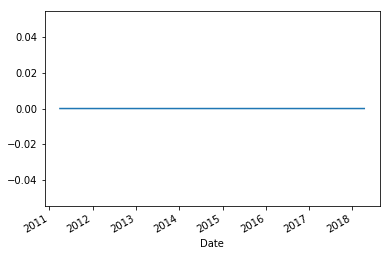

In [117]:
IS.close_prices.loc[:, 'GOOG'].fillna(0).plot()

In [120]:
test = yf.download(universe.tolist(), 
                    data_source = 'yahoo', 
                    start=pd.datetime(2011, 1, 1), 
                    end=pd.datetime(2012, 1, 1))

[*********************100%***********************]  177 of 177 downloaded


In [94]:
IS = InvestmentSimulator(universe=universe.tolist(), 
                         start_date=min(filtered_news.date.dt.date) - pd.Timedelta(10, unit='d'), 
                         end_date=max(filtered_news.date.dt.date) + pd.Timedelta(10, unit='d'))

# lets save time by not loading data every time we restart the cell:
saved_prices = IS.close_prices

def BuyEqual (data):
    return np.ones(len(universe)) / len(universe)

In [90]:
np.sum(IS.curent_portfolio * np.array(IS.close_prices.loc[pd.datetime(2011, 4, 8)]))

nan

In [91]:
np.sum(np.abs(IS.curent_portfolio))

nan

In [95]:
result = IS.run(BuyEqual)

In [68]:
plt.plot(result)

NameError: name 'result' is not defined